# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform a regression task and a classification task. You need to implement two classes, `DenseLayer` and `Feedforward`, and the `train` function `in implementation.py` 

In [78]:
# A bit of setup

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#need to have these two lines to work on my PC
#  https://stackoverflow.com/questions/43990046/tensorflow-blas-gemm-launch-failed
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%autosave 60


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Autosaving every 60 seconds


## 1. Implement the two classes and one function (10 points)

In this step, you should implement the two classes and one function mentioned above. The autograder can check the correcness of your two classes, `DenseLayer` and `Feedforward`. Correct implementation of each of the two classes worths 5 points, so you will 10 points if you make both correct. 

The autograder cannot check the training function because this function takes too much time to run. 



## 2. A toy regression problem

By this step, you should already have implemented all necessary classes and functions in `implementation.py`. In this task, we have a toy regression problem. Please the data below and think about this question: is overfitting a problem for this problem? **Please write your answer below** (This particular question has no points, but you may want to show your thought). 

Overfitting is most likely not an issue for this problem as all points are directly sampled from the underlying function. Because there is no random variation introduced, a network acting as a universal function approximator will not attempt to account for such random variations. Therefore, a function will be able to be identified that is able to match the observed data with 100% accuracy.

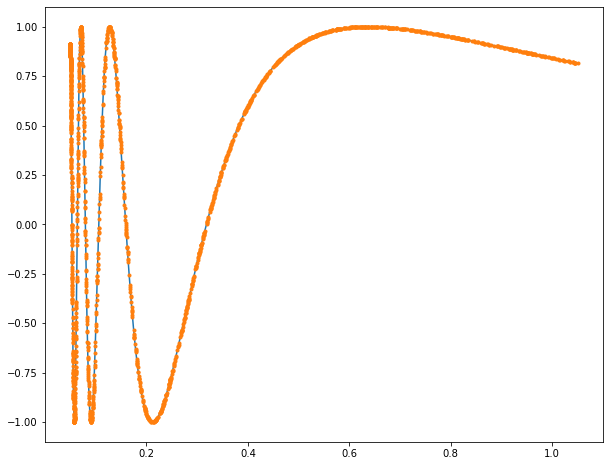

In [79]:
def target_func(x):
    y = np.sin(1 / x)
    return y

# initialize training and validation sets. 
x_train = np.power(np.random.random_sample([2000, 1]), 4) + 0.05
y_train = target_func(x_train)

x_val = np.power(np.random.random_sample([2000, 1]), 4) + 0.05
y_val = target_func(x_val)


# plot the function and data points
# Do you worry about overfitting problem?
sort_ind = np.argsort(x_train[:, 0])
plt.plot(x_train[sort_ind, 0], y_train[sort_ind, 0])
plt.plot(x_train[sort_ind, 0], y_train[sort_ind, 0], '.')


### Train the model  (5 points)

Now lets run your `train` function on this data. You will need to save your model to a file and submit it. We will test your saved model. You will earn 
 * 2 points if your validation MSE is smaller than 0.1
 * 4 points if your validation MSE is smaller than 0.05
 * 5 points if your validation MSE is smaller than 0.01



In [80]:
from implementation import train

#can change arguments as needed

#default
# model, history = train(x_train, y_train, x_val, y_val, depth=4, hidden_sizes=[8, 8, 8], 
#                        reg_weight=0.000001, num_train_epochs=150, task_type='regression')

#custom
model, history = train(x_train, y_train, x_val, y_val, depth=4, hidden_sizes=[8,8,8], 
                       reg_weight=0.001, num_train_epochs=1500, task_type='regression')


Epoch 1/1500

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

32/32 [==============================] - 0s 4ms/step - loss: 0.8463 - accuracy: 0.0000e+00 - val_loss: 0.5678 - val_accuracy: 0.0000e+00
Epoch 2/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.5010 - accuracy: 0.0000e+00 - val_loss: 0.4875 - val_accuracy: 0.0000e+00
Epoch 3/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.4533 - accuracy: 0.0000e+00 - val_loss: 0.4408 - val_accuracy: 0.0000e+00
Epoch 4/1500
32/32 [==============================] - 0s 2

32/32 [==============================] - 0s 2ms/step - loss: 0.1804 - accuracy: 0.0000e+00 - val_loss: 0.1871 - val_accuracy: 0.0000e+00
Epoch 51/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.1817 - accuracy: 0.0000e+00 - val_loss: 0.1872 - val_accuracy: 0.0000e+00
Epoch 52/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.1811 - accuracy: 0.0000e+00 - val_loss: 0.1859 - val_accuracy: 0.0000e+00
Epoch 53/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.1787 - accuracy: 0.0000e+00 - val_loss: 0.1845 - val_accuracy: 0.0000e+00
Epoch 54/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.1790 - accuracy: 0.0000e+00 - val_loss: 0.1856 - val_accuracy: 0.0000e+00
Epoch 55/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.1795 - accuracy: 0.0000e+00 - val_loss: 0.1903 - val_accuracy: 0.0000e+00
Epoch 56/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.1820 - accuracy: 0.0000e+00 - v

32/32 [==============================] - 0s 2ms/step - loss: 0.1744 - accuracy: 0.0000e+00 - val_loss: 0.1798 - val_accuracy: 0.0000e+00
Epoch 105/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.1738 - accuracy: 0.0000e+00 - val_loss: 0.1806 - val_accuracy: 0.0000e+00
Epoch 106/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.1735 - accuracy: 0.0000e+00 - val_loss: 0.1804 - val_accuracy: 0.0000e+00
Epoch 107/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.1747 - accuracy: 0.0000e+00 - val_loss: 0.1803 - val_accuracy: 0.0000e+00
Epoch 108/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.1739 - accuracy: 0.0000e+00 - val_loss: 0.1817 - val_accuracy: 0.0000e+00
Epoch 109/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.1747 - accuracy: 0.0000e+00 - val_loss: 0.1818 - val_accuracy: 0.0000e+00
Epoch 110/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.1786 - accuracy: 0.0000e+

Epoch 158/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.1746 - accuracy: 0.0000e+00 - val_loss: 0.1649 - val_accuracy: 0.0000e+00
Epoch 159/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.1608 - accuracy: 0.0000e+00 - val_loss: 0.1634 - val_accuracy: 0.0000e+00
Epoch 160/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.1611 - accuracy: 0.0000e+00 - val_loss: 0.1454 - val_accuracy: 0.0000e+00
Epoch 161/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.1505 - accuracy: 0.0000e+00 - val_loss: 0.1793 - val_accuracy: 0.0000e+00
Epoch 162/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.1467 - accuracy: 0.0000e+00 - val_loss: 0.1522 - val_accuracy: 0.0000e+00
Epoch 163/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.1124 - accuracy: 0.0000e+00 - val_loss: 0.0958 - val_accuracy: 0.0000e+00
Epoch 164/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0905 - acc

Epoch 212/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0065 - accuracy: 0.0000e+00 - val_loss: 0.0040 - val_accuracy: 0.0000e+00
Epoch 213/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 0.0000e+00 - val_loss: 0.0040 - val_accuracy: 0.0000e+00
Epoch 214/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 0.0000e+00 - val_loss: 0.0040 - val_accuracy: 0.0000e+00
Epoch 215/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 0.0000e+00 - val_loss: 0.0049 - val_accuracy: 0.0000e+00
Epoch 216/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 0.0000e+00 - val_loss: 0.0045 - val_accuracy: 0.0000e+00
Epoch 217/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 0.0000e+00 - val_loss: 0.0058 - val_accuracy: 0.0000e+00
Epoch 218/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0107 - acc

Epoch 266/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0375 - accuracy: 0.0000e+00 - val_loss: 0.0075 - val_accuracy: 0.0000e+00
Epoch 267/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 0.0000e+00 - val_loss: 0.0038 - val_accuracy: 0.0000e+00
Epoch 268/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 269/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 0.0000e+00 - val_loss: 0.0038 - val_accuracy: 0.0000e+00
Epoch 270/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 0.0000e+00 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 271/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 0.0000e+00 - val_loss: 0.0041 - val_accuracy: 0.0000e+00
Epoch 272/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0047 - acc

Epoch 320/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 321/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 0.0000e+00 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 322/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 0.0000e+00 - val_loss: 0.0048 - val_accuracy: 0.0000e+00
Epoch 323/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 0.0000e+00 - val_loss: 0.0043 - val_accuracy: 0.0000e+00
Epoch 324/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 0.0000e+00 - val_loss: 0.0042 - val_accuracy: 0.0000e+00
Epoch 325/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 0.0000e+00 - val_loss: 0.0033 - val_accuracy: 0.0000e+00
Epoch 326/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0038 - acc

Epoch 374/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 0.0000e+00 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 375/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 0.0000e+00 - val_loss: 0.0040 - val_accuracy: 0.0000e+00
Epoch 376/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 0.0000e+00 - val_loss: 0.0045 - val_accuracy: 0.0000e+00
Epoch 377/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 0.0000e+00 - val_loss: 0.0029 - val_accuracy: 0.0000e+00
Epoch 378/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 0.0000e+00 - val_loss: 0.0045 - val_accuracy: 0.0000e+00
Epoch 379/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 0.0000e+00 - val_loss: 0.0071 - val_accuracy: 0.0000e+00
Epoch 380/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0047 - acc

Epoch 428/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 0.0000e+00 - val_loss: 0.0122 - val_accuracy: 0.0000e+00
Epoch 429/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 0.0000e+00 - val_loss: 0.0030 - val_accuracy: 0.0000e+00
Epoch 430/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 0.0000e+00 - val_loss: 0.0048 - val_accuracy: 0.0000e+00
Epoch 431/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0044 - accuracy: 0.0000e+00 - val_loss: 0.0047 - val_accuracy: 0.0000e+00
Epoch 432/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0050 - accuracy: 0.0000e+00 - val_loss: 0.0031 - val_accuracy: 0.0000e+00
Epoch 433/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 0.0000e+00 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 434/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0048 - acc

Epoch 482/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 0.0000e+00 - val_loss: 0.0026 - val_accuracy: 0.0000e+00
Epoch 483/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 0.0000e+00 - val_loss: 0.0030 - val_accuracy: 0.0000e+00
Epoch 484/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 0.0000e+00 - val_loss: 0.0043 - val_accuracy: 0.0000e+00
Epoch 485/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 0.0000e+00 - val_loss: 0.0028 - val_accuracy: 0.0000e+00
Epoch 486/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 0.0000e+00 - val_loss: 0.0025 - val_accuracy: 0.0000e+00
Epoch 487/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 0.0000e+00 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 488/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0037 - acc

Epoch 536/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 0.0000e+00 - val_loss: 0.0048 - val_accuracy: 0.0000e+00
Epoch 537/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 0.0000e+00 - val_loss: 0.0055 - val_accuracy: 0.0000e+00
Epoch 538/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 0.0000e+00 - val_loss: 0.0026 - val_accuracy: 0.0000e+00
Epoch 539/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 0.0000e+00 - val_loss: 0.0026 - val_accuracy: 0.0000e+00
Epoch 540/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 0.0000e+00 - val_loss: 0.0029 - val_accuracy: 0.0000e+00
Epoch 541/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0062 - accuracy: 0.0000e+00 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 542/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0042 - acc

Epoch 590/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 0.0000e+00 - val_loss: 0.0030 - val_accuracy: 0.0000e+00
Epoch 591/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 0.0000e+00 - val_loss: 0.0139 - val_accuracy: 0.0000e+00
Epoch 592/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0082 - accuracy: 0.0000e+00 - val_loss: 0.0039 - val_accuracy: 0.0000e+00
Epoch 593/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 0.0000e+00 - val_loss: 0.0027 - val_accuracy: 0.0000e+00
Epoch 594/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 0.0000e+00 - val_loss: 0.0028 - val_accuracy: 0.0000e+00
Epoch 595/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 0.0000e+00 - val_loss: 0.0046 - val_accuracy: 0.0000e+00
Epoch 596/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0046 - acc

Epoch 644/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 0.0000e+00 - val_loss: 0.0025 - val_accuracy: 0.0000e+00
Epoch 645/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 0.0000e+00 - val_loss: 0.0029 - val_accuracy: 0.0000e+00
Epoch 646/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 0.0000e+00 - val_loss: 0.0028 - val_accuracy: 0.0000e+00
Epoch 647/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 0.0000e+00 - val_loss: 0.0055 - val_accuracy: 0.0000e+00
Epoch 648/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0082 - accuracy: 0.0000e+00 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 649/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 0.0000e+00 - val_loss: 0.0022 - val_accuracy: 0.0000e+00
Epoch 650/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0027 - acc

Epoch 698/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 699/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 0.0000e+00 - val_loss: 0.0029 - val_accuracy: 0.0000e+00
Epoch 700/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.0000e+00 - val_loss: 0.0020 - val_accuracy: 0.0000e+00
Epoch 701/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 0.0000e+00 - val_loss: 0.0039 - val_accuracy: 0.0000e+00
Epoch 702/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 0.0000e+00 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 703/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.0000e+00 - val_loss: 0.0024 - val_accuracy: 0.0000e+00
Epoch 704/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0024 - acc

Epoch 752/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 0.0000e+00 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 753/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0084 - accuracy: 0.0000e+00 - val_loss: 0.0041 - val_accuracy: 0.0000e+00
Epoch 754/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 0.0000e+00 - val_loss: 0.0024 - val_accuracy: 0.0000e+00
Epoch 755/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 0.0000e+00 - val_loss: 0.0077 - val_accuracy: 0.0000e+00
Epoch 756/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0141 - accuracy: 0.0000e+00 - val_loss: 0.0085 - val_accuracy: 0.0000e+00
Epoch 757/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 0.0000e+00 - val_loss: 0.0026 - val_accuracy: 0.0000e+00
Epoch 758/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0031 - acc

Epoch 806/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 0.0000e+00 - val_loss: 0.0048 - val_accuracy: 0.0000e+00
Epoch 807/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 0.0000e+00 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 808/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 0.0000e+00 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 809/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.0000e+00 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 810/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 0.0000e+00 - val_loss: 0.0028 - val_accuracy: 0.0000e+00
Epoch 811/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 0.0000e+00 - val_loss: 0.0026 - val_accuracy: 0.0000e+00
Epoch 812/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0022 - acc

Epoch 860/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 0.0000e+00 - val_loss: 0.0027 - val_accuracy: 0.0000e+00
Epoch 861/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 0.0000e+00 - val_loss: 0.0074 - val_accuracy: 0.0000e+00
Epoch 862/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 0.0000e+00 - val_loss: 0.0026 - val_accuracy: 0.0000e+00
Epoch 863/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 0.0000e+00 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 864/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 0.0000e+00 - val_loss: 0.0028 - val_accuracy: 0.0000e+00
Epoch 865/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.0000e+00 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 866/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0024 - acc

Epoch 914/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 0.0000e+00 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 915/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 0.0000e+00 - val_loss: 0.0023 - val_accuracy: 0.0000e+00
Epoch 916/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.0000e+00 - val_loss: 0.0039 - val_accuracy: 0.0000e+00
Epoch 917/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 0.0000e+00 - val_loss: 0.0020 - val_accuracy: 0.0000e+00
Epoch 918/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 0.0000e+00 - val_loss: 0.0024 - val_accuracy: 0.0000e+00
Epoch 919/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 0.0000e+00 - val_loss: 0.0018 - val_accuracy: 0.0000e+00
Epoch 920/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0035 - acc

Epoch 968/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.0000e+00 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 969/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 0.0000e+00 - val_loss: 0.0040 - val_accuracy: 0.0000e+00
Epoch 970/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0065 - accuracy: 0.0000e+00 - val_loss: 0.0237 - val_accuracy: 0.0000e+00
Epoch 971/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 0.0000e+00 - val_loss: 0.0028 - val_accuracy: 0.0000e+00
Epoch 972/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 0.0000e+00 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 973/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 0.0000e+00 - val_loss: 0.0023 - val_accuracy: 0.0000e+00
Epoch 974/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0026 - acc

Epoch 1022/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0055 - accuracy: 0.0000e+00 - val_loss: 0.0048 - val_accuracy: 0.0000e+00
Epoch 1023/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0098 - accuracy: 0.0000e+00 - val_loss: 0.0086 - val_accuracy: 0.0000e+00
Epoch 1024/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0243 - accuracy: 0.0000e+00 - val_loss: 0.0048 - val_accuracy: 0.0000e+00
Epoch 1025/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 0.0000e+00 - val_loss: 0.0020 - val_accuracy: 0.0000e+00
Epoch 1026/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 0.0000e+00 - val_loss: 0.0020 - val_accuracy: 0.0000e+00
Epoch 1027/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 0.0000e+00 - val_loss: 0.0018 - val_accuracy: 0.0000e+00
Epoch 1028/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.002

32/32 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 0.0000e+00 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 1076/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0057 - accuracy: 0.0000e+00 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 1077/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 0.0000e+00 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 1078/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.0000e+00 - val_loss: 0.0018 - val_accuracy: 0.0000e+00
Epoch 1079/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 0.0000e+00 - val_loss: 0.0048 - val_accuracy: 0.0000e+00
Epoch 1080/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 0.0000e+00 - val_loss: 0.0031 - val_accuracy: 0.0000e+00
Epoch 1081/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 0.

32/32 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 0.0000e+00 - val_loss: 0.0045 - val_accuracy: 0.0000e+00
Epoch 1129/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 0.0000e+00 - val_loss: 0.0028 - val_accuracy: 0.0000e+00
Epoch 1130/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 0.0000e+00 - val_loss: 0.0094 - val_accuracy: 0.0000e+00
Epoch 1131/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0051 - accuracy: 0.0000e+00 - val_loss: 0.0033 - val_accuracy: 0.0000e+00
Epoch 1132/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 0.0000e+00 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 1133/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 0.0000e+00 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 1134/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 0.

32/32 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 0.0000e+00 - val_loss: 0.0031 - val_accuracy: 0.0000e+00
Epoch 1182/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 0.0000e+00 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 1183/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 0.0000e+00 - val_loss: 0.0029 - val_accuracy: 0.0000e+00
Epoch 1184/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0082 - accuracy: 0.0000e+00 - val_loss: 0.0040 - val_accuracy: 0.0000e+00
Epoch 1185/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0094 - accuracy: 0.0000e+00 - val_loss: 0.0102 - val_accuracy: 0.0000e+00
Epoch 1186/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 0.0000e+00 - val_loss: 0.0030 - val_accuracy: 0.0000e+00
Epoch 1187/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 0.

32/32 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 0.0000e+00 - val_loss: 0.0027 - val_accuracy: 0.0000e+00
Epoch 1235/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.0000e+00 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 1236/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 0.0000e+00 - val_loss: 0.0030 - val_accuracy: 0.0000e+00
Epoch 1237/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 0.0000e+00 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 1238/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 0.0000e+00 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 1239/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 0.0000e+00 - val_loss: 0.0025 - val_accuracy: 0.0000e+00
Epoch 1240/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 0.

32/32 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 0.0000e+00 - val_loss: 0.0041 - val_accuracy: 0.0000e+00
Epoch 1288/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 0.0000e+00 - val_loss: 0.0039 - val_accuracy: 0.0000e+00
Epoch 1289/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 0.0000e+00 - val_loss: 0.0027 - val_accuracy: 0.0000e+00
Epoch 1290/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 0.0000e+00 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 1291/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 0.0000e+00 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 1292/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 0.0000e+00 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 1293/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 0.

32/32 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 0.0000e+00 - val_loss: 0.0042 - val_accuracy: 0.0000e+00
Epoch 1341/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 0.0000e+00 - val_loss: 0.0020 - val_accuracy: 0.0000e+00
Epoch 1342/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.0000e+00 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 1343/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 0.0000e+00 - val_loss: 0.0020 - val_accuracy: 0.0000e+00
Epoch 1344/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 0.0000e+00 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 1345/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.0000e+00 - val_loss: 0.0018 - val_accuracy: 0.0000e+00
Epoch 1346/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 0.

32/32 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 0.0000e+00 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 1394/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 0.0000e+00 - val_loss: 0.0049 - val_accuracy: 0.0000e+00
Epoch 1395/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 0.0000e+00 - val_loss: 0.0061 - val_accuracy: 0.0000e+00
Epoch 1396/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 0.0000e+00 - val_loss: 0.0022 - val_accuracy: 0.0000e+00
Epoch 1397/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 0.0000e+00 - val_loss: 0.0018 - val_accuracy: 0.0000e+00
Epoch 1398/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 0.0000e+00 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 1399/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 0.

32/32 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 0.0000e+00 - val_loss: 0.0031 - val_accuracy: 0.0000e+00
Epoch 1447/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.0000e+00 - val_loss: 0.0024 - val_accuracy: 0.0000e+00
Epoch 1448/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 0.0000e+00 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 1449/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.0000e+00 - val_loss: 0.0046 - val_accuracy: 0.0000e+00
Epoch 1450/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 0.0000e+00 - val_loss: 0.0025 - val_accuracy: 0.0000e+00
Epoch 1451/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 0.0000e+00 - val_loss: 0.0029 - val_accuracy: 0.0000e+00
Epoch 1452/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 0.

32/32 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 0.0000e+00 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 1500/1500
32/32 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.0000e+00 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer_103 (DenseLayer) (None, 8)                 16        
_________________________________________________________________
dense_layer_104 (DenseLayer) (None, 8)                 72        
_________________________________________________________________
dense_layer_105 (DenseLayer) (None, 8)                 72        
_________________________________________________________________
dense_layer_106 (DenseLayer) (None, 1)                 9         
Total params: 169
Trainable params: 169
Non-trainable params: 0
_____________________________

### Plot training trace and the fitted model

Text(0, 0.5, 'Loss')

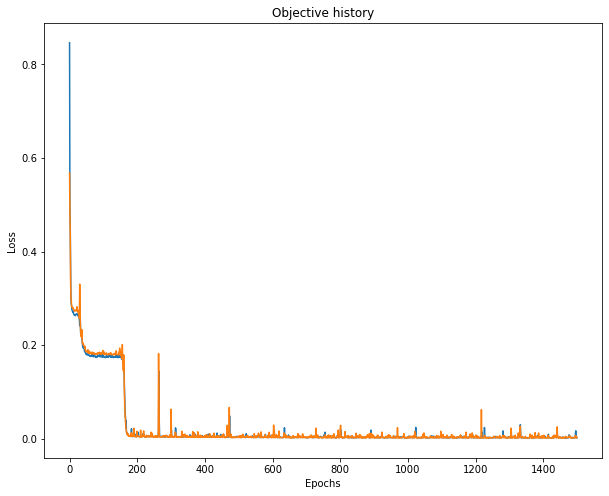

In [81]:
# Plot the loss function and train / validation accuracies
plt.subplot(1, 1, 1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Objective history')
plt.xlabel('Epochs')
plt.ylabel('Loss')


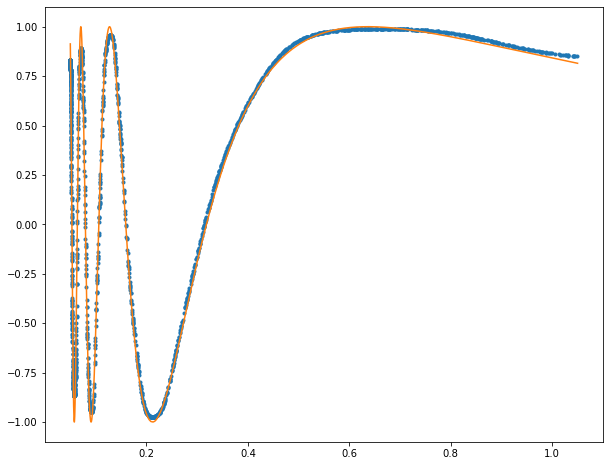

In [82]:
y_pred = model.predict(x_val)
plt.plot(x_val[:, 0], y_pred[:, 0], '.')

# actual values
plt.plot(x_train[sort_ind, 0], y_train[sort_ind, 0])
# plt.plot(x_val[:, 0], y_val[:, 0], '.')

### Save the model 

Please save your model as follows. Make sure the saved model can be loaded correctly with `tf.keras.models.load_model('sin_inv_x.kmod')`. *If your model cannot be loaded, you will get zero points for this problem.*



In [83]:
model.save('sin_inv_x.kmod')


INFO:tensorflow:Assets written to: sin_inv_x.kmod\assets


## 3. Classifying hand-written digits

This task is a classification problem on the famous MNIST dataset. 

### Load the data

In [39]:
from sklearn.model_selection import train_test_split

# load the dataset
data_train, data_test = tf.keras.datasets.mnist.load_data()

# separate a validation set
x_train, y_train = data_train 
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, stratify=y_train)

x_test, y_test = data_test

# treating images as vectors and create one hot representations of labesl

x_train = x_train.reshape([-1, 28 * 28])
x_val = x_val.reshape([-1, 28 * 28])
x_test = x_test.reshape([-1, 28 * 28])

y_train = tf.one_hot(y_train, depth=10).numpy()
y_val = tf.one_hot(y_val, depth=10).numpy()
y_test = tf.one_hot(y_test, depth=10).numpy()


print('Shape of training input: ', x_train.shape)
print('Shape of training labels: ', y_train.shape)
print('Shape of validation input: ', x_val.shape)
print('Shape of validation labels: ', y_val.shape)
print('Shape of test input: ', x_test.shape)
print('Shape of test labels: ', y_test.shape)



Shape of training input:  (48000, 784)
Shape of training labels:  (48000, 10)
Shape of validation input:  (12000, 784)
Shape of validation labels:  (12000, 10)
Shape of test input:  (10000, 784)
Shape of test labels:  (10000, 10)


In [40]:
#Test
print(tf.shape(x_train))

tf.Tensor([48000   784], shape=(2,), dtype=int32)


### Train a model

In [73]:
from implementation import train

#default - was able to get >90% accuracy with default training settings
# model, history = train(x_train, y_train, x_val, y_val, depth=3, hidden_sizes=[8, 8], reg_weight=0.01, num_train_epochs=40,  task_type='classification')

#debug
model, history = train(x_train, y_train, x_val, y_val, depth=3, hidden_sizes=[10, 10], reg_weight=0.01, num_train_epochs=1000,  task_type='classification')


Epoch 1/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.1003 - accuracy: 0.1778 - val_loss: 0.0915 - val_accuracy: 0.1958
Epoch 2/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0883 - accuracy: 0.2050 - val_loss: 0.0859 - val_accuracy: 0.2282
Epoch 3/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0826 - accuracy: 0.2697 - val_loss: 0.0782 - val_accuracy: 0.3212
Epoch 4/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0756 - accuracy: 0.3570 - val_loss: 0.0730 - val_accuracy: 0.3840
Epoch 5/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0681 - accuracy: 0.4325 - val_loss: 0.0613 - val_accuracy: 0.5139
Epoch 6/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0580 - accuracy: 0.5557 - val_loss: 0.0569 - val_accuracy: 0.5803
Epoch 7/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0527 - accuracy: 0.6190 - val_loss: 0.0509 - val_accuracy:

375/375 [==============================] - 1s 2ms/step - loss: 0.0108 - accuracy: 0.9358 - val_loss: 0.0136 - val_accuracy: 0.9182
Epoch 58/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0107 - accuracy: 0.9356 - val_loss: 0.0132 - val_accuracy: 0.9208
Epoch 59/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0108 - accuracy: 0.9357 - val_loss: 0.0137 - val_accuracy: 0.9180
Epoch 60/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0108 - accuracy: 0.9348 - val_loss: 0.0138 - val_accuracy: 0.9172
Epoch 61/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0105 - accuracy: 0.9369 - val_loss: 0.0133 - val_accuracy: 0.9211
Epoch 62/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0104 - accuracy: 0.9375 - val_loss: 0.0131 - val_accuracy: 0.9209
Epoch 63/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0105 - accuracy: 0.9364 - val_loss: 0.0126 - val_accuracy: 0.9252

375/375 [==============================] - 1s 2ms/step - loss: 0.0082 - accuracy: 0.9498 - val_loss: 0.0112 - val_accuracy: 0.9317
Epoch 114/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0080 - accuracy: 0.9511 - val_loss: 0.0118 - val_accuracy: 0.9296
Epoch 115/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0081 - accuracy: 0.9510 - val_loss: 0.0113 - val_accuracy: 0.9304
Epoch 116/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0081 - accuracy: 0.9508 - val_loss: 0.0117 - val_accuracy: 0.9307
Epoch 117/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0080 - accuracy: 0.9511 - val_loss: 0.0116 - val_accuracy: 0.9296
Epoch 118/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0081 - accuracy: 0.9502 - val_loss: 0.0112 - val_accuracy: 0.9325
Epoch 119/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0080 - accuracy: 0.9513 - val_loss: 0.0116 - val_accuracy: 

375/375 [==============================] - 1s 2ms/step - loss: 0.0070 - accuracy: 0.9566 - val_loss: 0.0110 - val_accuracy: 0.9344
Epoch 170/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0070 - accuracy: 0.9576 - val_loss: 0.0109 - val_accuracy: 0.9349
Epoch 171/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0071 - accuracy: 0.9561 - val_loss: 0.0108 - val_accuracy: 0.9342
Epoch 172/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0072 - accuracy: 0.9560 - val_loss: 0.0108 - val_accuracy: 0.9348
Epoch 173/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0071 - accuracy: 0.9568 - val_loss: 0.0110 - val_accuracy: 0.9331
Epoch 174/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0070 - accuracy: 0.9572 - val_loss: 0.0110 - val_accuracy: 0.9326
Epoch 175/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0071 - accuracy: 0.9567 - val_loss: 0.0109 - val_accuracy: 

375/375 [==============================] - 1s 2ms/step - loss: 0.0065 - accuracy: 0.9611 - val_loss: 0.0106 - val_accuracy: 0.9353
Epoch 226/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0066 - accuracy: 0.9600 - val_loss: 0.0109 - val_accuracy: 0.9347
Epoch 227/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0066 - accuracy: 0.9597 - val_loss: 0.0106 - val_accuracy: 0.9362
Epoch 228/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0065 - accuracy: 0.9606 - val_loss: 0.0108 - val_accuracy: 0.9357
Epoch 229/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0065 - accuracy: 0.9606 - val_loss: 0.0106 - val_accuracy: 0.9362
Epoch 230/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0065 - accuracy: 0.9605 - val_loss: 0.0108 - val_accuracy: 0.9349
Epoch 231/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0066 - accuracy: 0.9601 - val_loss: 0.0109 - val_accuracy: 

375/375 [==============================] - 1s 2ms/step - loss: 0.0062 - accuracy: 0.9622 - val_loss: 0.0107 - val_accuracy: 0.9368
Epoch 282/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0062 - accuracy: 0.9626 - val_loss: 0.0106 - val_accuracy: 0.9362
Epoch 283/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0062 - accuracy: 0.9624 - val_loss: 0.0107 - val_accuracy: 0.9359
Epoch 284/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0062 - accuracy: 0.9631 - val_loss: 0.0108 - val_accuracy: 0.9355
Epoch 285/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0062 - accuracy: 0.9629 - val_loss: 0.0109 - val_accuracy: 0.9358
Epoch 286/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0062 - accuracy: 0.9629 - val_loss: 0.0109 - val_accuracy: 0.9351
Epoch 287/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0062 - accuracy: 0.9631 - val_loss: 0.0107 - val_accuracy: 

375/375 [==============================] - 1s 2ms/step - loss: 0.0059 - accuracy: 0.9643 - val_loss: 0.0105 - val_accuracy: 0.9376
Epoch 338/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0061 - accuracy: 0.9637 - val_loss: 0.0108 - val_accuracy: 0.9363
Epoch 339/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0060 - accuracy: 0.9638 - val_loss: 0.0107 - val_accuracy: 0.9358
Epoch 340/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0060 - accuracy: 0.9643 - val_loss: 0.0112 - val_accuracy: 0.9343
Epoch 341/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0060 - accuracy: 0.9633 - val_loss: 0.0108 - val_accuracy: 0.9364
Epoch 342/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0059 - accuracy: 0.9644 - val_loss: 0.0108 - val_accuracy: 0.9356
Epoch 343/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0060 - accuracy: 0.9643 - val_loss: 0.0108 - val_accuracy: 

375/375 [==============================] - 1s 2ms/step - loss: 0.0058 - accuracy: 0.9653 - val_loss: 0.0109 - val_accuracy: 0.9350
Epoch 394/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0057 - accuracy: 0.9659 - val_loss: 0.0111 - val_accuracy: 0.9342
Epoch 395/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0058 - accuracy: 0.9652 - val_loss: 0.0110 - val_accuracy: 0.9355
Epoch 396/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0058 - accuracy: 0.9653 - val_loss: 0.0106 - val_accuracy: 0.9368
Epoch 397/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0057 - accuracy: 0.9658 - val_loss: 0.0108 - val_accuracy: 0.9359
Epoch 398/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0058 - accuracy: 0.9660 - val_loss: 0.0108 - val_accuracy: 0.9361
Epoch 399/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0059 - accuracy: 0.9646 - val_loss: 0.0106 - val_accuracy: 

375/375 [==============================] - 1s 2ms/step - loss: 0.0057 - accuracy: 0.9663 - val_loss: 0.0107 - val_accuracy: 0.9364
Epoch 450/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0057 - accuracy: 0.9662 - val_loss: 0.0107 - val_accuracy: 0.9367
Epoch 451/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0056 - accuracy: 0.9664 - val_loss: 0.0108 - val_accuracy: 0.9367
Epoch 452/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0057 - accuracy: 0.9659 - val_loss: 0.0108 - val_accuracy: 0.9359
Epoch 453/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0057 - accuracy: 0.9659 - val_loss: 0.0109 - val_accuracy: 0.9360
Epoch 454/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0056 - accuracy: 0.9664 - val_loss: 0.0109 - val_accuracy: 0.9349
Epoch 455/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0057 - accuracy: 0.9657 - val_loss: 0.0105 - val_accuracy: 

375/375 [==============================] - 1s 2ms/step - loss: 0.0054 - accuracy: 0.9676 - val_loss: 0.0112 - val_accuracy: 0.9335
Epoch 506/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0056 - accuracy: 0.9668 - val_loss: 0.0108 - val_accuracy: 0.9368
Epoch 507/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0055 - accuracy: 0.9673 - val_loss: 0.0108 - val_accuracy: 0.9372
Epoch 508/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0055 - accuracy: 0.9674 - val_loss: 0.0108 - val_accuracy: 0.9357
Epoch 509/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0055 - accuracy: 0.9672 - val_loss: 0.0108 - val_accuracy: 0.9366
Epoch 510/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0053 - accuracy: 0.9685 - val_loss: 0.0110 - val_accuracy: 0.9354
Epoch 511/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0054 - accuracy: 0.9681 - val_loss: 0.0107 - val_accuracy: 

375/375 [==============================] - 1s 2ms/step - loss: 0.0054 - accuracy: 0.9676 - val_loss: 0.0110 - val_accuracy: 0.9352
Epoch 562/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0056 - accuracy: 0.9662 - val_loss: 0.0107 - val_accuracy: 0.9364
Epoch 563/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0053 - accuracy: 0.9686 - val_loss: 0.0110 - val_accuracy: 0.9342
Epoch 564/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0054 - accuracy: 0.9677 - val_loss: 0.0108 - val_accuracy: 0.9362
Epoch 565/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0055 - accuracy: 0.9671 - val_loss: 0.0108 - val_accuracy: 0.9369
Epoch 566/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0053 - accuracy: 0.9689 - val_loss: 0.0108 - val_accuracy: 0.9354
Epoch 567/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0054 - accuracy: 0.9676 - val_loss: 0.0109 - val_accuracy: 

375/375 [==============================] - 1s 2ms/step - loss: 0.0053 - accuracy: 0.9681 - val_loss: 0.0108 - val_accuracy: 0.9366
Epoch 618/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0054 - accuracy: 0.9682 - val_loss: 0.0105 - val_accuracy: 0.9388
Epoch 619/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0053 - accuracy: 0.9688 - val_loss: 0.0106 - val_accuracy: 0.9385
Epoch 620/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0053 - accuracy: 0.9685 - val_loss: 0.0107 - val_accuracy: 0.9371
Epoch 621/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0054 - accuracy: 0.9680 - val_loss: 0.0110 - val_accuracy: 0.9345
Epoch 622/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0054 - accuracy: 0.9679 - val_loss: 0.0109 - val_accuracy: 0.9367
Epoch 623/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0054 - accuracy: 0.9683 - val_loss: 0.0108 - val_accuracy: 

375/375 [==============================] - 1s 2ms/step - loss: 0.0053 - accuracy: 0.9689 - val_loss: 0.0109 - val_accuracy: 0.9360
Epoch 674/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0054 - accuracy: 0.9680 - val_loss: 0.0109 - val_accuracy: 0.9347
Epoch 675/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0052 - accuracy: 0.9691 - val_loss: 0.0110 - val_accuracy: 0.9355
Epoch 676/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0053 - accuracy: 0.9681 - val_loss: 0.0109 - val_accuracy: 0.9357
Epoch 677/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0054 - accuracy: 0.9679 - val_loss: 0.0107 - val_accuracy: 0.9362
Epoch 678/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0051 - accuracy: 0.9697 - val_loss: 0.0107 - val_accuracy: 0.9370
Epoch 679/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0053 - accuracy: 0.9683 - val_loss: 0.0107 - val_accuracy: 

375/375 [==============================] - 1s 2ms/step - loss: 0.0052 - accuracy: 0.9691 - val_loss: 0.0110 - val_accuracy: 0.9365
Epoch 730/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0053 - accuracy: 0.9687 - val_loss: 0.0112 - val_accuracy: 0.9353
Epoch 731/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0052 - accuracy: 0.9697 - val_loss: 0.0109 - val_accuracy: 0.9360
Epoch 732/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0052 - accuracy: 0.9690 - val_loss: 0.0110 - val_accuracy: 0.9355
Epoch 733/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0051 - accuracy: 0.9694 - val_loss: 0.0109 - val_accuracy: 0.9358
Epoch 734/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0051 - accuracy: 0.9692 - val_loss: 0.0111 - val_accuracy: 0.9346
Epoch 735/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0052 - accuracy: 0.9689 - val_loss: 0.0108 - val_accuracy: 

375/375 [==============================] - 1s 2ms/step - loss: 0.0052 - accuracy: 0.9691 - val_loss: 0.0113 - val_accuracy: 0.9339
Epoch 786/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0051 - accuracy: 0.9696 - val_loss: 0.0113 - val_accuracy: 0.9335
Epoch 787/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0052 - accuracy: 0.9689 - val_loss: 0.0112 - val_accuracy: 0.9342
Epoch 788/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0052 - accuracy: 0.9690 - val_loss: 0.0113 - val_accuracy: 0.9337
Epoch 789/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0052 - accuracy: 0.9689 - val_loss: 0.0111 - val_accuracy: 0.9352
Epoch 790/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0053 - accuracy: 0.9686 - val_loss: 0.0113 - val_accuracy: 0.9341
Epoch 791/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0053 - accuracy: 0.9685 - val_loss: 0.0113 - val_accuracy: 

375/375 [==============================] - 1s 2ms/step - loss: 0.0051 - accuracy: 0.9698 - val_loss: 0.0112 - val_accuracy: 0.9348
Epoch 842/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0051 - accuracy: 0.9690 - val_loss: 0.0111 - val_accuracy: 0.9349
Epoch 843/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0051 - accuracy: 0.9697 - val_loss: 0.0113 - val_accuracy: 0.9331
Epoch 844/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0052 - accuracy: 0.9686 - val_loss: 0.0114 - val_accuracy: 0.9331
Epoch 845/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0050 - accuracy: 0.9701 - val_loss: 0.0113 - val_accuracy: 0.9342
Epoch 846/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0052 - accuracy: 0.9691 - val_loss: 0.0113 - val_accuracy: 0.9346
Epoch 847/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0052 - accuracy: 0.9686 - val_loss: 0.0112 - val_accuracy: 

375/375 [==============================] - 1s 2ms/step - loss: 0.0051 - accuracy: 0.9697 - val_loss: 0.0113 - val_accuracy: 0.9331
Epoch 898/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0050 - accuracy: 0.9707 - val_loss: 0.0114 - val_accuracy: 0.9339
Epoch 899/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0051 - accuracy: 0.9698 - val_loss: 0.0114 - val_accuracy: 0.9321
Epoch 900/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0052 - accuracy: 0.9695 - val_loss: 0.0112 - val_accuracy: 0.9343
Epoch 901/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0052 - accuracy: 0.9690 - val_loss: 0.0116 - val_accuracy: 0.9327
Epoch 902/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0051 - accuracy: 0.9694 - val_loss: 0.0113 - val_accuracy: 0.9321
Epoch 903/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0051 - accuracy: 0.9697 - val_loss: 0.0112 - val_accuracy: 

375/375 [==============================] - 1s 2ms/step - loss: 0.0051 - accuracy: 0.9701 - val_loss: 0.0113 - val_accuracy: 0.9342
Epoch 954/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0051 - accuracy: 0.9696 - val_loss: 0.0116 - val_accuracy: 0.9317
Epoch 955/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0051 - accuracy: 0.9697 - val_loss: 0.0113 - val_accuracy: 0.9338
Epoch 956/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0050 - accuracy: 0.9697 - val_loss: 0.0112 - val_accuracy: 0.9338
Epoch 957/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0050 - accuracy: 0.9698 - val_loss: 0.0113 - val_accuracy: 0.9342
Epoch 958/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0050 - accuracy: 0.9706 - val_loss: 0.0113 - val_accuracy: 0.9335
Epoch 959/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0050 - accuracy: 0.9697 - val_loss: 0.0114 - val_accuracy: 

### Debug the training (10 points)

A neural network with your initial setting may not work straightforwardly, so you will need to diagnose the problems in the training procedure. One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks. This task gives you a chance to gain some experience. Below, you should experiment with different values of the various hyperparameters, including 
 * data preparation (data normalization and data augmentation)
 * the achitecture (depth, hidden layer sizes, and activation functions), 
 * optimization (optimization algorithm, learning rate, learning rate decay, batch size, and numer of training epochs)
 * regularization (regularization weight, dropout).

**Expected results**. You goal in this exercise is to get as good of a result as you can, with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).  You should be aim to achieve a classification accuracy of greater than 80% on the test results.

**Grading**. You will get 
  * 5 points if your model has an accuracy over 0.70
  * 8 points if your model has an accuracy over 0.80
  * 10 points if your model has an accuracy over 0.90

In [74]:
#debug
print(history.history.keys()) #only shows up as having "loss" and "val_loss", no accuracy or val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


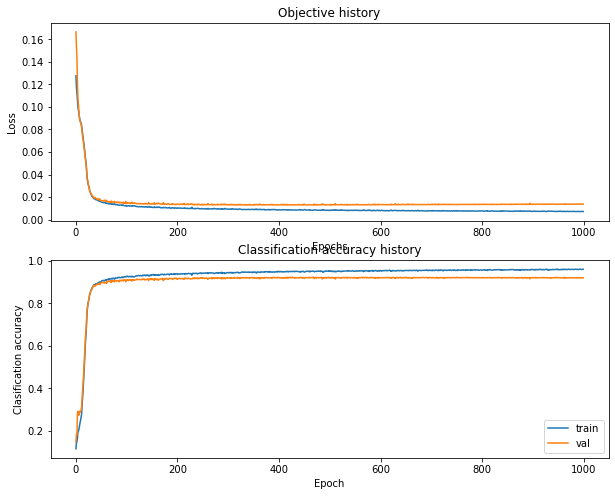

In [70]:




# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Objective history')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()


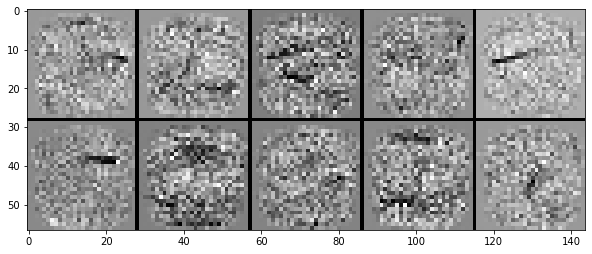

In [75]:
from vis_utils import visualize_grid

#was this
W1 = model.layers[1].W.numpy() #layer 0 is not batch norm
W1 = W1.transpose()
W1 = W1.reshape([W1.shape[0], 28, 28, 1])

plt.imshow(visualize_grid(W1))


Finally, test the model on the test set and show the accuracy. 

In [76]:
y_pred = model.predict(x_test.astype(np.float32))

acc = np.mean(np.argmax(y_test, axis=1) == np.argmax(y_pred, axis=1))

print('The test accuracy is ', acc)

The test accuracy is  0.9394


### Save the model

In [77]:
# Careful with this one...
model.save('mnist_cls.kmod')

INFO:tensorflow:Assets written to: mnist_cls.kmod\assets


## Question (5 points): what have you learned from this assignment? 

Please summarize your model tuning experience into three points below. If possible, please elaborate after your summarization. 

*Answer*:-------------------------------------------

1.) A network's ability to train a model is extremely dependant on selecting good hyperparameter values.

Learning rate: too small and can get stuck in local minima, too large and it will miss global minima 
Batch size: increasing batch size speeds up training but can hurt generalization from training data to validation data
Number of neurons: more complex networks take longer to train but can more closely approximate some more complicated functions

2.) Different problems require different activation functions. 

Regression tasks require both positive and negative outputs, therefore tanh is used as the final layer. 
Classification tasks require all output neurons ot sum to 1 (representing the relative probability of selecting each). Thus, the softmax function must be used.
Relu activation functions seem to work best in the middle layers for most tasks.

3.) Batch normaliztion is important to make sure each layer is recieving inputs within a useful range

Because both sigmoid and tanh are "Squishing functions" all inputs greater than ~5 will yield similar outputs which will make learning progress slowly. This is referred to as the vanishing gradient problem.
Relu has a similar problem where learning a large negative bias for a weight can cause the neuron to enter a "dead" state in which it will always output 0 and be unable to escape because all gradients will also be 0.